# ****1. About Dataset****

Details of Features are as below:

* Id: Unique identifier for each individual in the dataset.
* Year_Birth: The birth year of the individual.
* Education: The highest level of education attained by the individual.
* Marital_Status: The marital status of the individual.
* Income: The annual income of the individual.
* Kidhome: The number of young children in the household.
* Teenhome: The number of teenagers in the household.
* Dt_Customer: The date when the customer was first enrolled or became a part of the company's database.
* Recency: The number of days since the last purchase or interaction.
* MntWines: The amount spent on wines.
* MntFruits: The amount spent on fruits.
* MntMeatProducts: The amount spent on meat products.
* MntFishProducts: The amount spent on fish products.
* MntSweetProducts: The amount spent on sweet products.
* MntGoldProds: The amount spent on gold products.
* NumDealsPurchases: The number of purchases made with a discount or as part of a deal.
* NumWebPurchases: The number of purchases made through the company's website.
* NumCatalogPurchases: The number of purchases made through catalogs.
* NumStorePurchases: The number of purchases made in physical stores.
* NumWebVisitsMonth: The number of visits to the company's website in a month.
* AcceptedCmp3: Binary indicator (1 or 0) whether the individual accepted the third marketing campaign.
* AcceptedCmp4: Binary indicator (1 or 0) whether the individual accepted the fourth marketing campaign.
* AcceptedCmp5: Binary indicator (1 or 0) whether the individual accepted the fifth marketing campaign.
* AcceptedCmp1: Binary indicator (1 or 0) whether the individual accepted the first marketing campaign.
* AcceptedCmp2: Binary indicator (1 or 0) whether the individual accepted the second marketing campaign.
* Complain: Binary indicator (1 or 0) whether the individual has made a complaint.
* Z_CostContact: A constant cost associated with contacting a customer.
* Z_Revenue: A constant revenue associated with a successful campaign response.
* Response: Binary indicator (1 or 0) whether the individual responded to the marketing campaign.

# ****2. Import Libraries****

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
import plotly.graph_objects as go



from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


from yellowbrick.cluster import KElbowVisualizer


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.set_option('display.max_columns', 999)

import warnings
warnings.filterwarnings('ignore')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-clustering/customer_segmentation.csv


# ****3. Import Dataset****

In [2]:
# Importing Data

data = pd.read_csv(r'/kaggle/input/customer-segmentation-clustering/customer_segmentation.csv')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [3]:
# Making shallow copy of data to keep the original data as it is.

df = data.copy()

# ****4. Exploratory Data Analysis****

In [4]:
# Getting Column names

df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
# Information of Each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# Finding Missing Values

df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
# Return Dataframe where Income is null.

df[df['Income'].isnull() == True]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


In [8]:
# Dropping Null valued data

df.dropna(inplace = True)

In [9]:
# Find Duplicated Data

df.duplicated().sum()

np.int64(0)

In [10]:
# Describe Numerical Data

df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [11]:
# Count of Each Category in Education Column

df['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [12]:
# Change datatype of Datetime data

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [14]:
# Calculate Age of Customers

df['Age'] = 2025 - df['Year_Birth']

In [15]:
# Calculate total number of children by adding columns: Kidhome and Teenhome

df['Total_Children'] = df['Kidhome'] + df['Teenhome']

In [16]:
# Total Amout Spent by each customer

spent_col = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

df['Total_Spending'] = df[spent_col].sum(axis = 1)

In [17]:
# No. of Days passed since customer joined

df['Customer_Since'] = (pd.Timestamp('today') - df['Dt_Customer']).dt.days

Text(0.5, 1.0, 'Age Distribution')

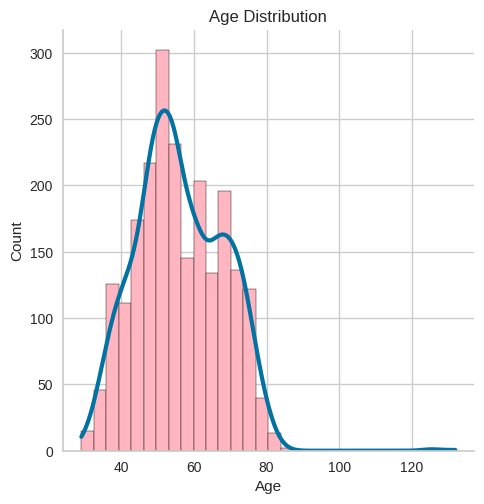

In [18]:
# plotting Histogram of count of Age of customers

sns.displot(df['Age'], kind = 'hist', facecolor = 'lightpink', bins = 30, kde = True, line_kws = {'color' : 'black', 'lw' : 3})
plt.title('Age Distribution')

Text(0.5, 1.0, 'Income Distribution')

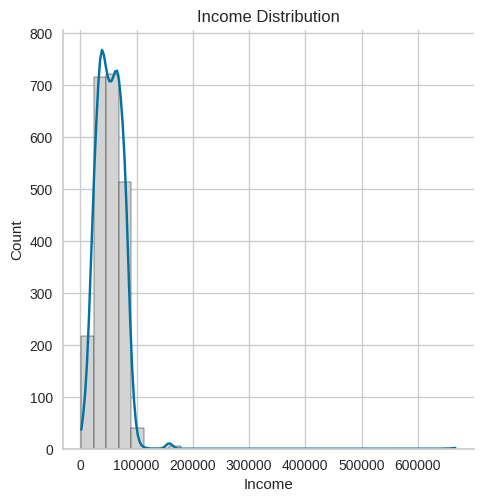

In [19]:
# Plotting Histogram fro income Distribution of customers 

sns.displot(df['Income'], kind = 'hist', kde = True, facecolor = 'lightgray', bins = 30)
plt.title('Income Distribution')

Text(0.5, 1.0, 'Spending Distribution')

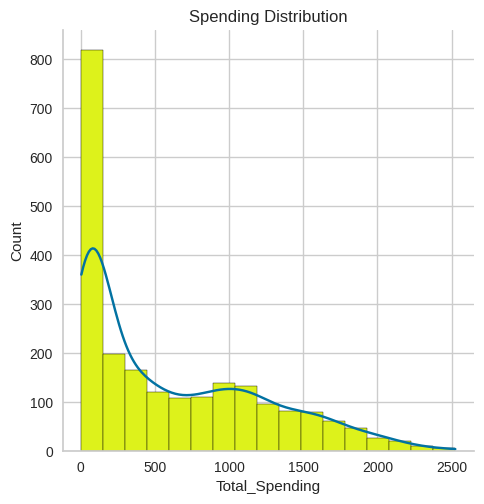

In [20]:
# Graph Of highest Spending Customers

sns.displot(df['Total_Spending'], kind = 'hist', kde = True, facecolor = '#ddf21b')
plt.title('Spending Distribution')

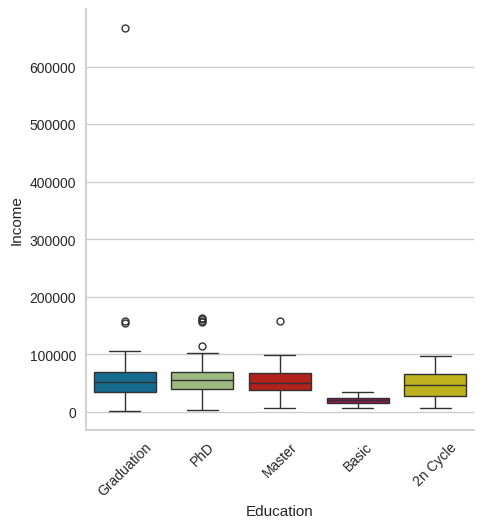

In [21]:
# Box Plotting of Education against Income of Customers

sns.catplot(kind = 'box', data = df, x = 'Education', y = 'Income', hue= 'Education')
plt.xticks(rotation = 45)
plt.show()

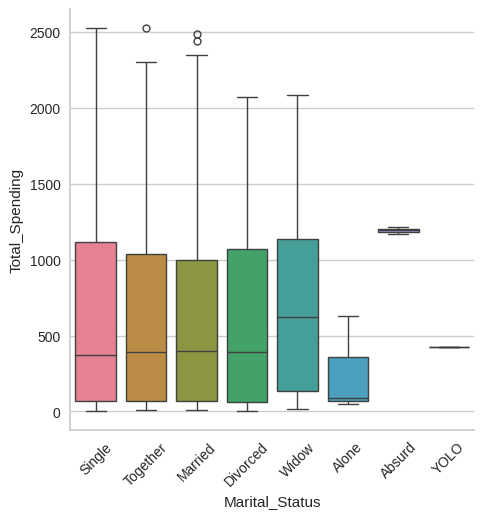

In [22]:
# Spending Based on Marital Status of Customers

sns.catplot(data = df, x = 'Marital_Status', y = 'Total_Spending', kind = 'box', hue = 'Marital_Status')
plt.xticks(rotation = 45)
plt.show()

In [23]:


corr = df[['Income', 'Age', 'Recency', 'Total_Spending', 'NumWebPurchases', 'NumStorePurchases']]
corr

,Income,Age,Recency,Total_Spending,NumWebPurchases,NumStorePurchases
0,58138.0,68,58,1617,8,4
1,46344.0,71,38,27,1,2
2,71613.0,60,26,776,8,10
3,26646.0,41,26,53,2,4
4,58293.0,44,94,422,5,6
...,...,...,...,...,...,...
2235,61223.0,58,46,1341,9,4
2236,64014.0,79,56,444,8,5
2237,56981.0,44,91,1241,2,13
2238,69245.0,69,8,843,6,10


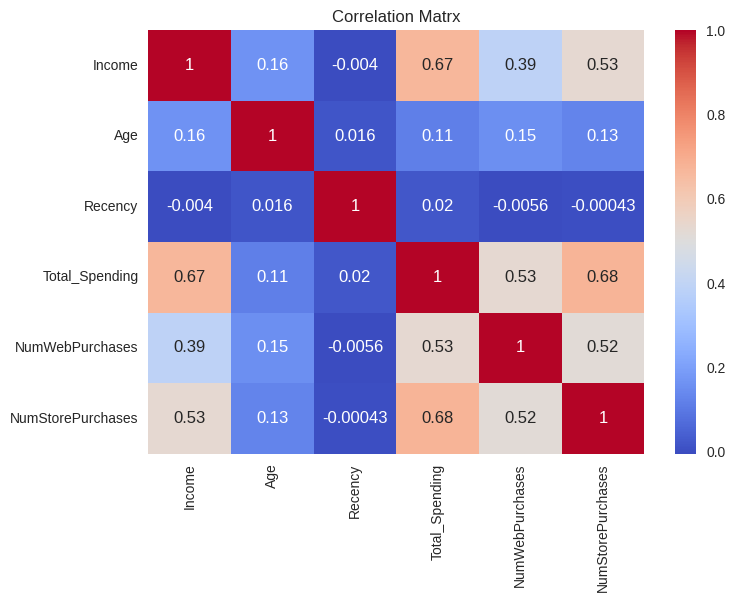

In [24]:
sns.heatmap(corr.corr(),annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrx')
plt.show()

In [25]:
pivot_income = df.pivot_table(values = 'Income', index = 'Education', columns = 'Marital_Status', aggfunc = 'mean')
pivot_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,49395.130435,46201.100000,53673.944444,44736.410714,51392.200000,NaN
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,79244.0,34176.0,54526.042017,50800.258741,51322.182927,55758.480702,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53530.560000,52109.009804,58401.545455,NaN
PhD,NaN,35860.0,53096.615385,58138.031579,53314.614583,56041.422414,60288.083333,48432.0


Text(0.5, 1.0, 'Average Income by Education')

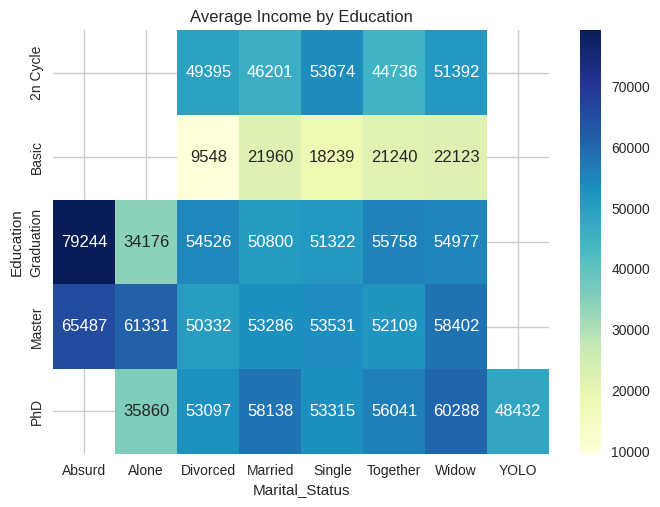

In [26]:
sns.heatmap(pivot_income, annot = True, fmt = '.0f', cmap = 'YlGnBu')
plt.title('Average Income by Education')

In [27]:
group1 = df.groupby('Education')['Total_Spending'].mean().sort_values(ascending = False)

In [28]:
group1

Education
PhD           676.733888
Graduation    621.686380
Master        609.767123
2n Cycle      494.930000
Basic          81.796296
Name: Total_Spending, dtype: float64

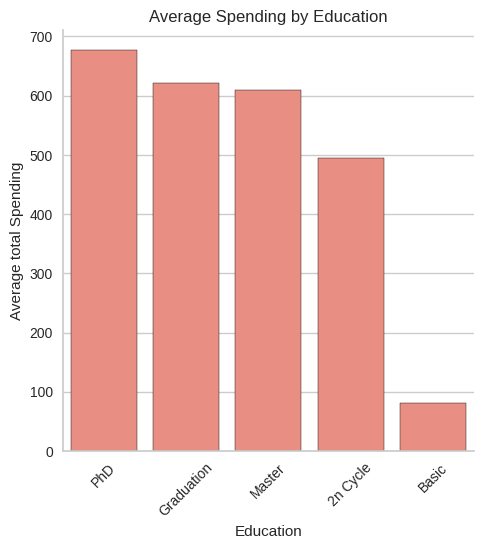

In [29]:
sns.catplot(group1, kind = 'bar', color = 'salmon', edgecolor = 'black')
plt.title('Average Spending by Education')
plt.ylabel('Average total Spending')
plt.xticks(rotation = 45)
plt.show()

In [30]:
df['AcceptedAny'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis = 1)

In [31]:
df['AcceptedAny'].unique()

array([1, 0, 3, 2, 4, 5])

In [32]:
df['AcceptedAny'] = df['AcceptedAny'].apply(lambda x : 1 if x > 0 else 0)

In [33]:
df['AcceptedAny'].unique()

array([1, 0])

In [34]:
group2 = df.groupby('Marital_Status')['AcceptedAny'].mean().sort_values(ascending = False)

In [35]:
group2

Marital_Status
Absurd      0.500000
YOLO        0.500000
Widow       0.342105
Alone       0.333333
Single      0.312102
Divorced    0.297414
Married     0.252042
Together    0.251309
Name: AcceptedAny, dtype: float64

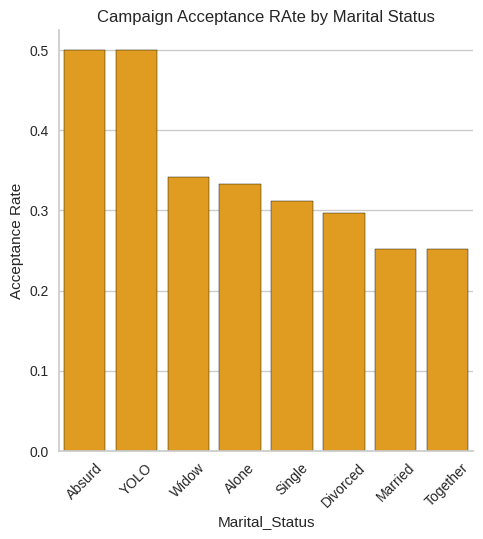

In [36]:
sns.catplot(group2, kind = 'bar', color = 'orange', edgecolor = 'black')
plt.title('Campaign Acceptance RAte by Marital Status')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation = 45)
plt.show()

In [37]:
bins = [18, 30, 40, 50, 60, 70, 90]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']


df['AgeGroup'] = pd.cut(df['Age'], bins = bins, labels = labels)
df['AgeGroup']

0       60-69
1         70+
2       50-59
3       40-49
4       40-49
        ...  
2235    50-59
2236      70+
2237    40-49
2238    60-69
2239      70+
Name: AgeGroup, Length: 2216, dtype: category
Categories (6, object): ['18-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70+']

In [38]:
group3 = df.groupby('AgeGroup')['Income'].mean()
group3

AgeGroup
18-29    46658.000000
30-39    46283.028302
40-49    49224.877034
50-59    50812.913303
60-69    56200.827887
70+      58944.316294
Name: Income, dtype: float64

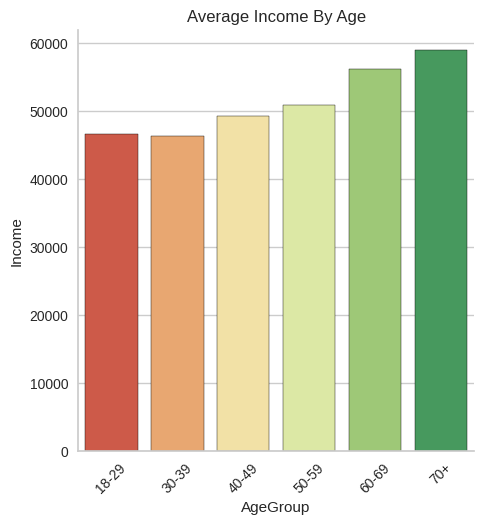

In [39]:
sns.catplot(group3, kind = 'bar', palette = 'RdYlGn', edgecolor = 'black')
plt.title('Average Income By Age')
plt.ylabel('Income')
plt.xticks(rotation = 45)
plt.show()

In [40]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spending,Customer_Since,AcceptedAny,AgeGroup
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,68,0,1617,4877,1,60-69
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,71,2,27,4327,0,70+
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,60,0,776,4526,0,50-59
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,41,1,53,4353,0,40-49
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,44,1,422,4375,0,40-49


In [41]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since',
       'AcceptedAny', 'AgeGroup'],
      dtype='object')

In [42]:
features = ['Age', 'Income', 'Total_Spending', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

In [43]:
X = df[features].copy()

In [44]:
X

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth
0,68,58138.0,1617,8,4,7
1,71,46344.0,27,1,2,5
2,60,71613.0,776,8,10,4
3,41,26646.0,53,2,4,6
4,44,58293.0,422,5,6,5
...,...,...,...,...,...,...
2235,58,61223.0,1341,9,4,5
2236,79,64014.0,444,8,5,7
2237,44,56981.0,1241,2,13,6
2238,69,69245.0,843,6,10,3


In [45]:
scaler = StandardScaler()


X_scaled = scaler.fit_transform(X)

In [46]:
wcss = []
Silhouette_score = []


for i in range(2, 16):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    cluster_labels = kmeans.fit_predict(X_scaled)

    wcss.append(kmeans.inertia_)
    sil_score = silhouette_score(X_scaled, cluster_labels)

    Silhouette_score.append(sil_score)

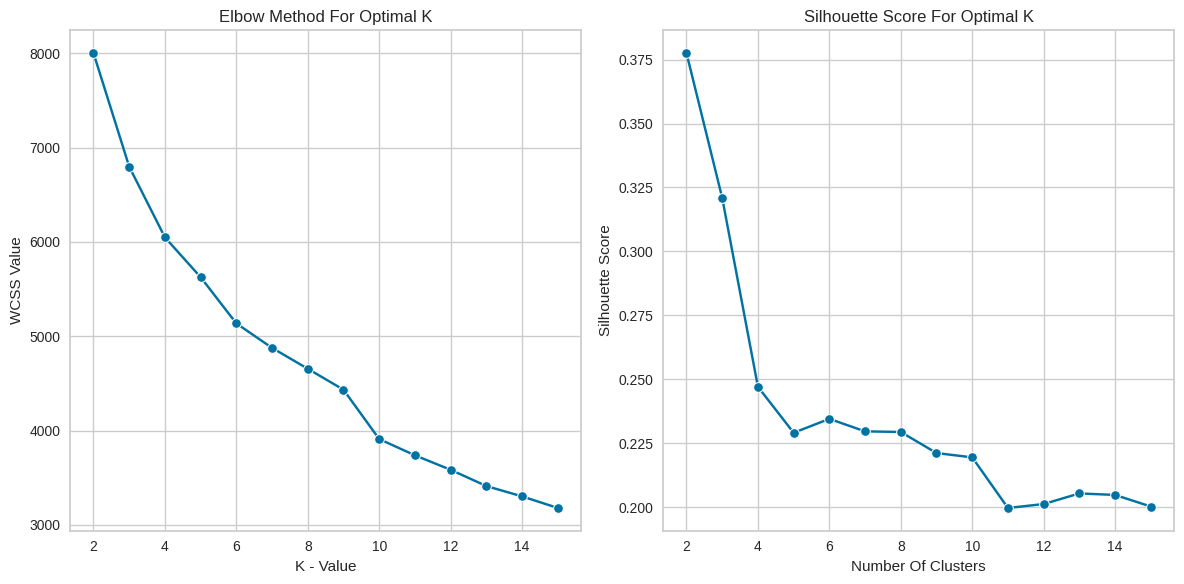

In [47]:
plt.figure(figsize = (12,6))
plt.subplot(121)
sns.lineplot(x = np.arange(2, 16), y = wcss, marker = 'o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('K - Value')
plt.ylabel('WCSS Value')
plt.grid(True)

plt.subplot(122)
sns.lineplot(x = np.arange(2,16), y = Silhouette_score, marker = 'o')
plt.title('Silhouette Score For Optimal K')
plt.xlabel('Number Of Clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.grid(True)
plt.show()

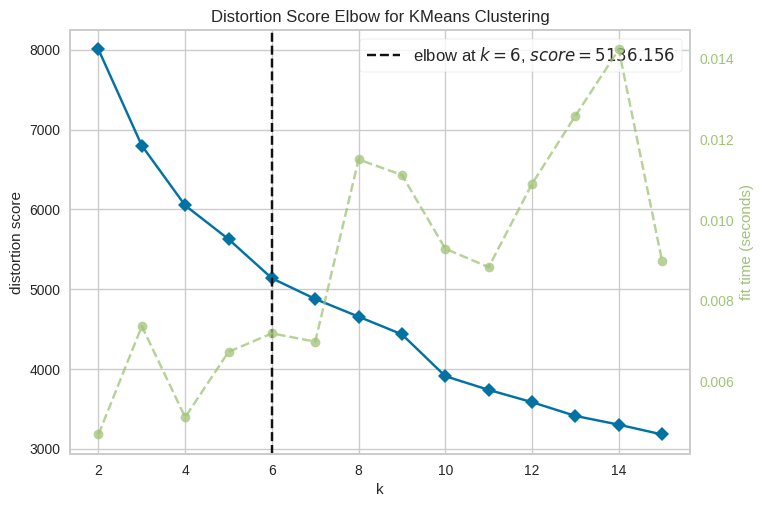

np.int64(6)

In [48]:
kmeans = KMeans(random_state = 42)
elbow = KElbowVisualizer(kmeans, k = (2, 16))
elbow.fit(X_scaled)
elbow.show(block = True)
elbow.elbow_value_

In [49]:
kmeans = KMeans(n_clusters = 6, random_state = 42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [50]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spending,Customer_Since,AcceptedAny,AgeGroup,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,68,0,1617,4877,1,60-69,3
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,71,2,27,4327,0,70+,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,60,0,776,4526,0,50-59,1
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,41,1,53,4353,0,40-49,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,44,1,422,4375,0,40-49,3


In [51]:
cluster_summary = df.groupby('Cluster')[features].mean()

In [52]:
cluster_summary

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth
Cluster,,,,,,
0,47.213292,30460.689335,83.925811,1.989181,2.972179,6.972179
1,58.082353,65332.760784,1138.090196,7.345098,10.709804,5.556863
2,65.931759,41202.049869,133.068241,2.128609,3.687664,5.440945
3,58.501416,53528.685552,606.294618,7.011331,5.932011,6.702550
4,45.668942,79712.269625,1319.914676,4.453925,8.112628,2.443686
5,69.630662,74782.881533,1217.108014,4.536585,8.101045,2.452962


In [53]:
df['Cluster'].value_counts()

Cluster
0    647
2    381
3    353
4    293
5    287
1    255
Name: count, dtype: int64

In [54]:
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(X_scaled)
df['PCA1'], df['PCA2'] = pca_data[:, 0], pca_data[:, 1]


In [55]:
pca_data

array([[ 1.1051798 ,  1.63021086],
       [-1.3340086 , -0.2097081 ],
       [ 1.88841354,  0.63959163],
       ...,
       [ 1.1427021 , -0.66746009],
       [ 1.89843476,  0.30996359],
       [-0.8395238 ,  0.72707899]])

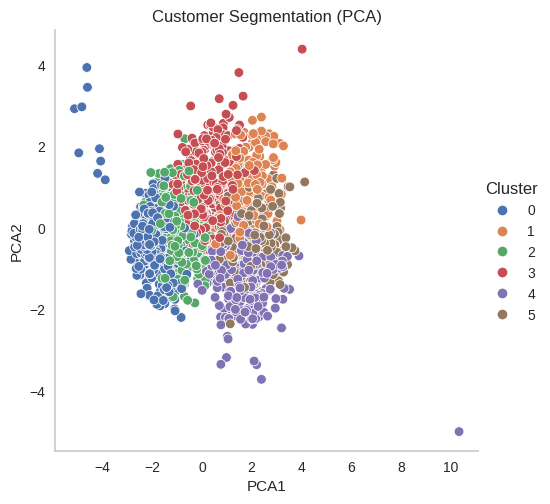

In [56]:
sns.relplot(data = df, x = 'PCA1', y = 'PCA2', hue = 'Cluster', palette = 'deep')
plt.title('Customer Segmentation (PCA)')
plt.grid(False)
plt.show()

In [57]:
cluster_summary

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth
Cluster,,,,,,
0,47.213292,30460.689335,83.925811,1.989181,2.972179,6.972179
1,58.082353,65332.760784,1138.090196,7.345098,10.709804,5.556863
2,65.931759,41202.049869,133.068241,2.128609,3.687664,5.440945
3,58.501416,53528.685552,606.294618,7.011331,5.932011,6.702550
4,45.668942,79712.269625,1319.914676,4.453925,8.112628,2.443686
5,69.630662,74782.881533,1217.108014,4.536585,8.101045,2.452962


# ****Conclusion :****

From above Analysis we can conclude that

- **`Cluster 0 :`** Low-income, low-spending customers who browse frequently online but convert rarely, making them highly price-sensitive and promotion-driven.

- **`Cluster 1 :`** Older, high-income, very high–value omnichannel customers with strong loyalty and consistent purchasing across web and store.

- **`Cluster 2 :`** Senior, moderate-income customers with low engagement and low spending, showing conservative and infrequent buying behavior.

- **`Cluster 3 :`** Upper-middle-income, digitally active customers with moderate to high spending and good potential for cross-sell and upsell.

- **`Cluster 4 :`** Younger affluent customers with the highest spending who prefer efficient, store-focused purchasing with minimal browsing.

- **`Cluster 5 :`** Wealthy senior customers with very high spending and high conversion rates, exhibiting focused, decisive buying and strong loyalty.